In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from scipy.linalg import svd

In [3]:
X = pd.read_csv("data/winequality-red.csv", sep=";")

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
y = X.quality
X.drop('quality', axis=1, inplace=True)

In [5]:
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

In [6]:
pca = PCA(n_components=6).fit(X)

Z = pca.transform(X)

In [7]:
pca.components_

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [8]:
pca.explained_variance_

array([3.09913244, 1.92590969, 1.55054349, 1.21323253, 0.95929207,
       0.65960826])

In [9]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439])

In [10]:
Z.shape

(1599, 6)

In [11]:
pd.DataFrame(Z)

,0,1,2,3,4,5
0,-1.619023,0.450809,-1.773899,0.043727,0.066994,-0.913635
1,-0.798920,1.855972,-0.911405,0.547895,-0.018386,0.929423
2,-0.748245,0.881763,-1.171028,0.410892,-0.043517,0.401348
3,2.356935,-0.269892,0.243413,-0.928160,-1.498680,-0.130976
4,-1.619023,0.450809,-1.773899,0.043727,0.066994,-0.913635
...,...,...,...,...,...,...
1594,-2.149828,0.814031,0.616870,0.407559,-0.240861,0.054818
1595,-2.213804,0.892822,1.806837,0.413874,0.119555,-0.674500
1596,-1.455674,0.311648,1.123888,0.491723,0.193655,-0.506251
1597,-2.269808,0.979485,0.627768,0.639570,0.067714,-0.860139


In [12]:
u, s, v = svd(X, full_matrices=False)

In [13]:
Z1 = u[:, :6].dot(np.diag(s[:6]))

pd.DataFrame(Z1)

,0,1,2,3,4,5
0,-1.619023,0.450809,1.773899,0.043727,-0.066994,0.913635
1,-0.798920,1.855972,0.911405,0.547895,0.018386,-0.929423
2,-0.748245,0.881763,1.171028,0.410892,0.043517,-0.401348
3,2.356935,-0.269892,-0.243413,-0.928160,1.498680,0.130976
4,-1.619023,0.450809,1.773899,0.043727,-0.066994,0.913635
...,...,...,...,...,...,...
1594,-2.149828,0.814031,-0.616870,0.407559,0.240861,-0.054818
1595,-2.213804,0.892822,-1.806837,0.413874,-0.119555,0.674500
1596,-1.455674,0.311648,-1.123888,0.491723,-0.193655,0.506251
1597,-2.269808,0.979485,-0.627768,0.639570,-0.067714,0.860139


In [14]:
Z2 = X.dot(v[:6].T)

Z2

,0,1,2,3,4,5
0,-1.619023,0.450809,1.773899,0.043727,-0.066994,0.913635
1,-0.798920,1.855972,0.911405,0.547895,0.018386,-0.929423
2,-0.748245,0.881763,1.171028,0.410892,0.043517,-0.401348
3,2.356935,-0.269892,-0.243413,-0.928160,1.498680,0.130976
4,-1.619023,0.450809,1.773899,0.043727,-0.066994,0.913635
...,...,...,...,...,...,...
1594,-2.149828,0.814031,-0.616870,0.407559,0.240861,-0.054818
1595,-2.213804,0.892822,-1.806837,0.413874,-0.119555,0.674500
1596,-1.455674,0.311648,-1.123888,0.491723,-0.193655,0.506251
1597,-2.269808,0.979485,-0.627768,0.639570,-0.067714,0.860139


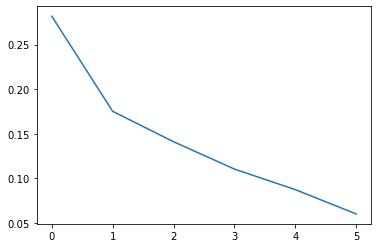

In [15]:
plt.plot(pca.explained_variance_ratio_)

In [16]:
pca.explained_variance_ratio_.sum()

0.8552471350764357

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [26]:
pipline = Pipeline([
    ('clf', KNeighborsClassifier())
])

In [27]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [28]:
y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [38]:
full = cross_val_score(pipline, X, y, scoring='accuracy', cv=cv).mean()
full

0.5615928683385579

In [32]:
newline = Pipeline([
    ('pca', PCA(n_components=6)),
    ('clf', KNeighborsClassifier())
])

In [34]:
scores = []

for n in range(1, 11):
    newline = Pipeline([
        ('pca', PCA(n_components=n)),
        ('clf', KNeighborsClassifier())
    ])
    scores.append(
        cross_val_score(newline, X, y, scoring='accuracy', cv=cv).mean()
    )
scores

[0.4333914576802508,
 0.49714537617554855,
 0.5597257053291536,
 0.5659561128526647,
 0.5684717868338558,
 0.5566105015673981,
 0.5609737460815047,
 0.560342868338558,
 0.5553409090909092,
 0.554717868338558]

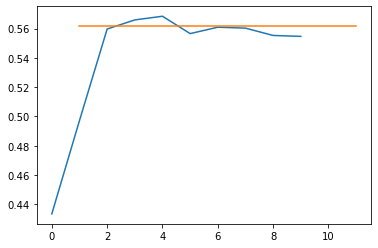

In [37]:
plt.plot(scores)
plt.plot([1, 11], [full, full])